In [2]:
! pip install missingno

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import plotly.express as px
import missingno as msno
warnings.filterwarnings('ignore')

%matplotlib inline

# Load and Describe Data

---------

## Load Data

Dataset yang kita gunakan adalah "Used Car Auction Prices" yang berasal dari Kaggle

In [4]:
dfcar = pd.read_csv('car_prices.csv', on_bad_lines="skip")
dfcar.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
35757,2012,Chevrolet,Traverse,LS,SUV,automatic,1gnkrfed4cj376333,tx,3.0,25810.0,gray,gray,texas auto brokers,16600,16500,Wed Feb 11 2015 02:00:00 GMT-0800 (PST)
517136,2012,Jeep,Compass,Limited,suv,automatic,1c4njdcb0cd623901,wi,4.2,35952.0,red,beige,ari,16450,17600,Wed Jun 10 2015 03:00:00 GMT-0700 (PDT)
475081,2013,Nissan,Sentra,SR,sedan,automatic,3n1ab7ap8dl656624,ca,4.1,27951.0,white,black,visalia ford,11750,12400,Thu May 28 2015 05:45:00 GMT-0700 (PDT)
551936,2014,Toyota,Tundra,SR5,double cab,automatic,5tfrm5f11ex076303,ga,2.1,7588.0,gray,gray,toyota financial services,27200,26600,Thu Jun 18 2015 03:00:00 GMT-0700 (PDT)
481819,2013,Dodge,Dart,SXT,sedan,automatic,1c3cdfba0dd267622,mo,3.5,42794.0,silver,black,the hertz corporation,10550,10600,Wed Jun 03 2015 03:00:00 GMT-0700 (PDT)


#### List fitur pada dataset adalah sebagai berikut :

1. Year : Tanggal produksi dari mobil.
2. Make : Merk dari mobil.
3. Model : Edisi dari tiap merk mobil.
4. Trim : Versi trim dari mobil.
5. Body : Tipe bentuk dari mobil.
6. Transmission : Transmisi yang digunakan pada mobil.
7. VIN : Vehicle Identification Number.
8. State : Negara bagian tempat mobil dijual.
9. Condition : Kondisi dari mobil pada saat dijual.
10. Odometer : Jarak tempuh mobil semenjak tanggal manufacture.
11. Color : Warna eksterior dari mobil.
12. Interior : Warna interior dari mobil.
13. Seller : Penjual dari mobil (Car dealers).
14. MMR : Manhiem Market Record, market yang memprediksi harga mobil.
15. Sellingprice : Nilai jual mobil.
16. Saledate : Tanggal mobil dijual.

## Data Exploration

In [5]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


1. Total dari data ada 558811 entries
2. Tipe dari data int, float dan object, dan terlihat sudah sesuai dengan kolomnya. Namun, untuk kolom 'saledate' tipe data yang awalnya 'object', dirasa perlu diubah ke date time.
3. Terdapat nilai Null pada beberapa fitur

In [6]:
# Mengubah tipe data object ke datetime
dfcar['saledate'] = pd.to_datetime(dfcar['saledate'], utc=True)

dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          558811 non-null  int64              
 1   make          548510 non-null  object             
 2   model         548412 non-null  object             
 3   trim          548160 non-null  object             
 4   body          545616 non-null  object             
 5   transmission  493458 non-null  object             
 6   vin           558811 non-null  object             
 7   state         558811 non-null  object             
 8   condition     547017 non-null  float64            
 9   odometer      558717 non-null  float64            
 10  color         558062 non-null  object             
 11  interior      558062 non-null  object             
 12  seller        558811 non-null  object             
 13  mmr           558811 non-null  int64        

Tipe data 'saledate' yang awalnya object sudah diubah ke date time.

In [7]:
# Mengecek null value

dfcar.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

Terdapat 9 fitur yang memiliki Null value, yaitu make, model, trim, body, transmission, condition, odometer, color, interior. Perlu diadakan tindak lanjut di Data Cleaning

In [8]:
# Mengecek duplicated rows

dfcar.duplicated().sum()

0

Dataset tidak memiliki data duplikat sehingga tidak diperlukan penanganan.

In [9]:
# Mengkategorikan fitur sesuai dari tipe data
num = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cat = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

# Membatasi angka setelah koma hingga hanya 3 angka
pd.set_option('display.float_format', lambda x: '%.3f' % x)

dfcar[num].describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000,547017.000,558717.000,558811.000,558811.000
mean,2010.039,3.425,68323.196,13769.325,13611.262
std,3.967,0.949,53397.753,9679.875,9749.657
min,1982.000,1.000,1.000,25.000,1.000
25%,2007.000,2.700,28374.000,7100.000,6900.000
50%,2012.000,3.600,52256.000,12250.000,12100.000
75%,2013.000,4.200,99112.000,18300.000,18200.000
max,2015.000,5.000,999999.000,182000.000,230000.000


1. Condition memiliki value antara 1-5.
2. Nilai dari odometer terlihat memiliki jarak yang jauh antara min dan max dimana nilai min nya adalah 1 dan max nya hampir 1 juta. Tentu ini adalah hal yang terkesan janggal. Selain itu, nilai mean dan median nya juga terhitung sangat jauh yaitu 16000.
3. Secara keseluruhan, nilai MMR dan sellingprice tidak terlalu berbeda. Namun, nilai min-max dan mean-median nya sangat jauh, sehingga perlu diperhatikan lebih lanjut untuk tahap berikutnya.
4. Beberapa kolom di fitur numerical juga terdapat null value, sehingga perlu ditangani pada tahap berikutnya.

In [10]:
dfcar[cat].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,2015-02-09 17:30:00+00:00
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-01-01 01:15:00+00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-20 19:30:00+00:00


1. Dari data diatas, kita bisa melihat secara sekilas nilai apa yang paling teratas, sering muncul, dan berapa jumlah unique value dari masing-masing fitur.
2. Sebagai contoh, Ford merupakan brand yang paling populer diantara 96 total brand lain. Selain itu, mobil tipe sedan juga termasuk yang paling favorit.
3. Transmisi automatic lebih dicari customer dibanding manual dengan jumlah lebih dari 90%
4. Warna hitam tetap mendominasi baik di eksterior maupun interior.

----------

# EDA (Exploratory Data Analysis)

-------

## UNIVARIATE ANALYSIS 

Pada tahap EDA, kita akan menganalisis baik analisis univariate ataupun multivariate. Pada univariate analysis, kami menganalisis fitur-fitur yang sekiranya memberikan dampak besar terhadap harga jual mobil. Tak hanya itu, kami juga memvisualisasikan bagaimana persebaran data pada dataset baik ditinjau dari outliers, skewness, null value, dll.

### Unique Value From Each Feature

In [11]:
dfcar['year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983], dtype=int64)

Semua value sudah sesuai, yaitu berupa angka.

In [12]:
dfcar['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

Terdapat null value pada fitur 'make'.
Value dari kolom 'make' masih terlalu beragam dimana terdapat kata yang huruf awal kapital, kata yang berisi kapital semua, kata yang berisi lower case semua. Oleh karena itu, kita akan mengubah value nya menjadi lower case semua di tahap berikutnya. 

In [13]:
dfcar['transmission'].unique()

array(['automatic', nan, 'manual'], dtype=object)

Seperti yang kita tahu terdapat 2 jenis transmisi, yaitu manual dan automatic. Namun, terdapat value 'NaN' di dalam kolom 'transmission' sehingga perlu dijadikan catatan untuk tahap selanjutnya.

In [14]:
dfcar['condition'].unique()

array([5. , 4.5, 4.1, 4.3, 1. , 3.4, 2. , 4.2, 3. , 4.8, nan, 4.9, 1.7,
       1.9, 2.9, 3.8, 4.4, 4.7, 3.2, 4. , 2.5, 3.7, 3.9, 3.1, 2.8, 4.6,
       3.6, 3.5, 2.6, 2.1, 2.2, 2.7, 2.4, 3.3, 2.3, 1.5, 1.6, 1.8, 1.2,
       1.4, 1.1, 1.3])

Untuk kondisi mobil bervariasi dari 1 sampai 5, serta terdapat null value.

In [15]:
dfcar['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

Semua value di kolom 'state' sudah sesuai. Tidak ada null value, namun kita bisa mengubah nya menjadi upper case seperti lazimnya kode wilayah yang menggunakan kapital. 

### Outlier Numerik (year, condition, odometer, MMR, sellingprice)

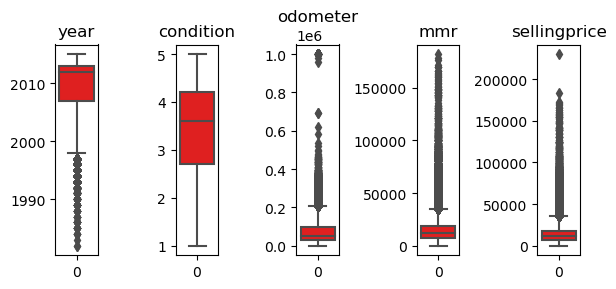

In [20]:
# Melihat penampilan outlier

plt.figure(figsize=(6, 3))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(dfcar[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

Dapat dilihat bahwa mmr dan selling price memiliki outlier paling banyak, begitu juga dengan kolom odometer dan year. Untuk kuartil dan mediannya pun juga terkesan jauh. Hal ini dapat terjadi karena banyaknya data mobil (500k++) sehingga nilai mmr dan selling price mapun odometer juga sangat bervariasi. Kolom yang terlihat paling normal hanyalah kolom 'condition'. Hasil analisis ini merupakan bentuk visual dari statistik data yang telah kita lakukan sebelumnya pada tahap Data Exploration.

### Distribusi Data (year, condition, odometer, MMR, sellingprice)

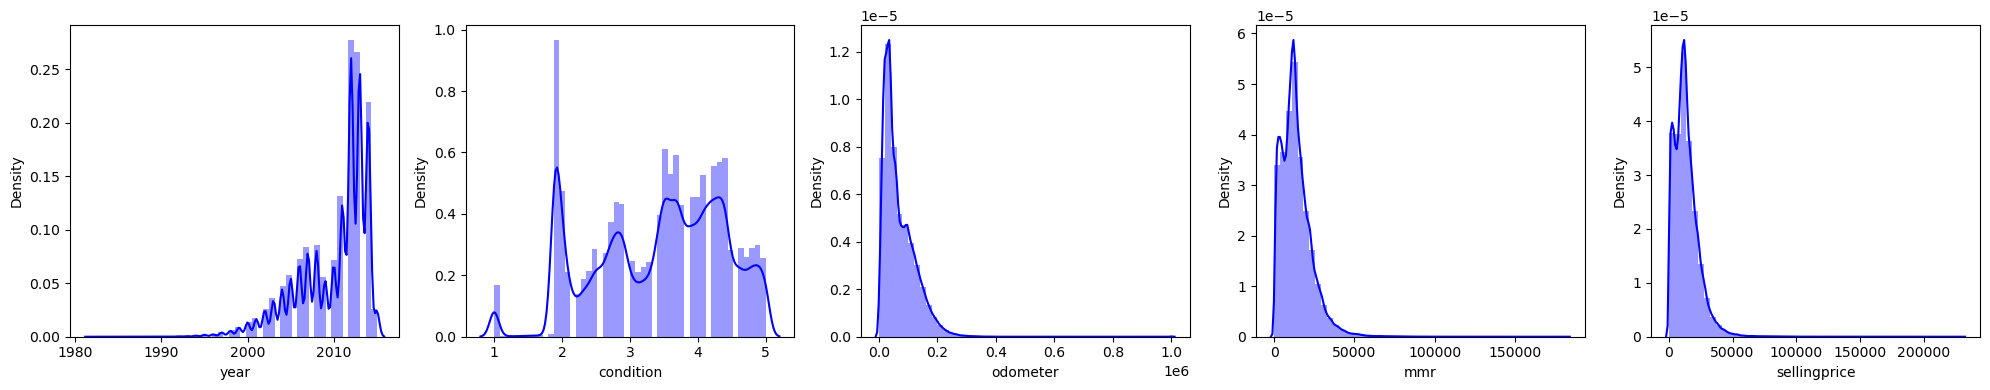

In [18]:
# Melihat grafik distribusi

plt.figure(figsize=(20, 4))
for i in range(0, len(num)):
    plt.subplot(1, 5, i+1)
    sns.distplot(dfcar[num[i]], color='blue')
    plt.tight_layout()

Dari grafik diatas dapat terlihat :
1. Dari kolom 'year' kita bisa melihat bahwa penjualan cenderung mengalami peningkatan pada setiap tahunnya dan puncak penjualan berada di antara tahun 2010 hingga 2015. Kita juga bisa melihat bahwa kolom 'year' termasuk left-skewed.
2. Pada grafik 'condition', kondisi mobil yang berada di kisaran angka 2 menjadi mayoritas dari kondisi lainnya. Hal ini menunjukkan bahwa kondisi mobil bekas bernilai kurang baik. Namun, tidak sedikit juga kondisi mobil yang bernilai 3 keatas hingga 4. 
3. Untuk odometer dapat terlihat bahwa mayoritas berada di angka 0 hingga 0.2 yang artinya odometer berkisar antara 0 hingga 200k. Sedangkan untuk pemakaian mobil diatas 200k terhitung jarang. 
4. Kolom 'mmr' dan 'sellingprice' terlihat serupa dimana harga jual mobil berkisar di angka 0-50000. 
5. Dari kolom-kolom diatas, kolom 'odometer', 'mmr', dan 'sellingprice' termasuk right-skewed.

### Visualize Null Values

<Axes: >

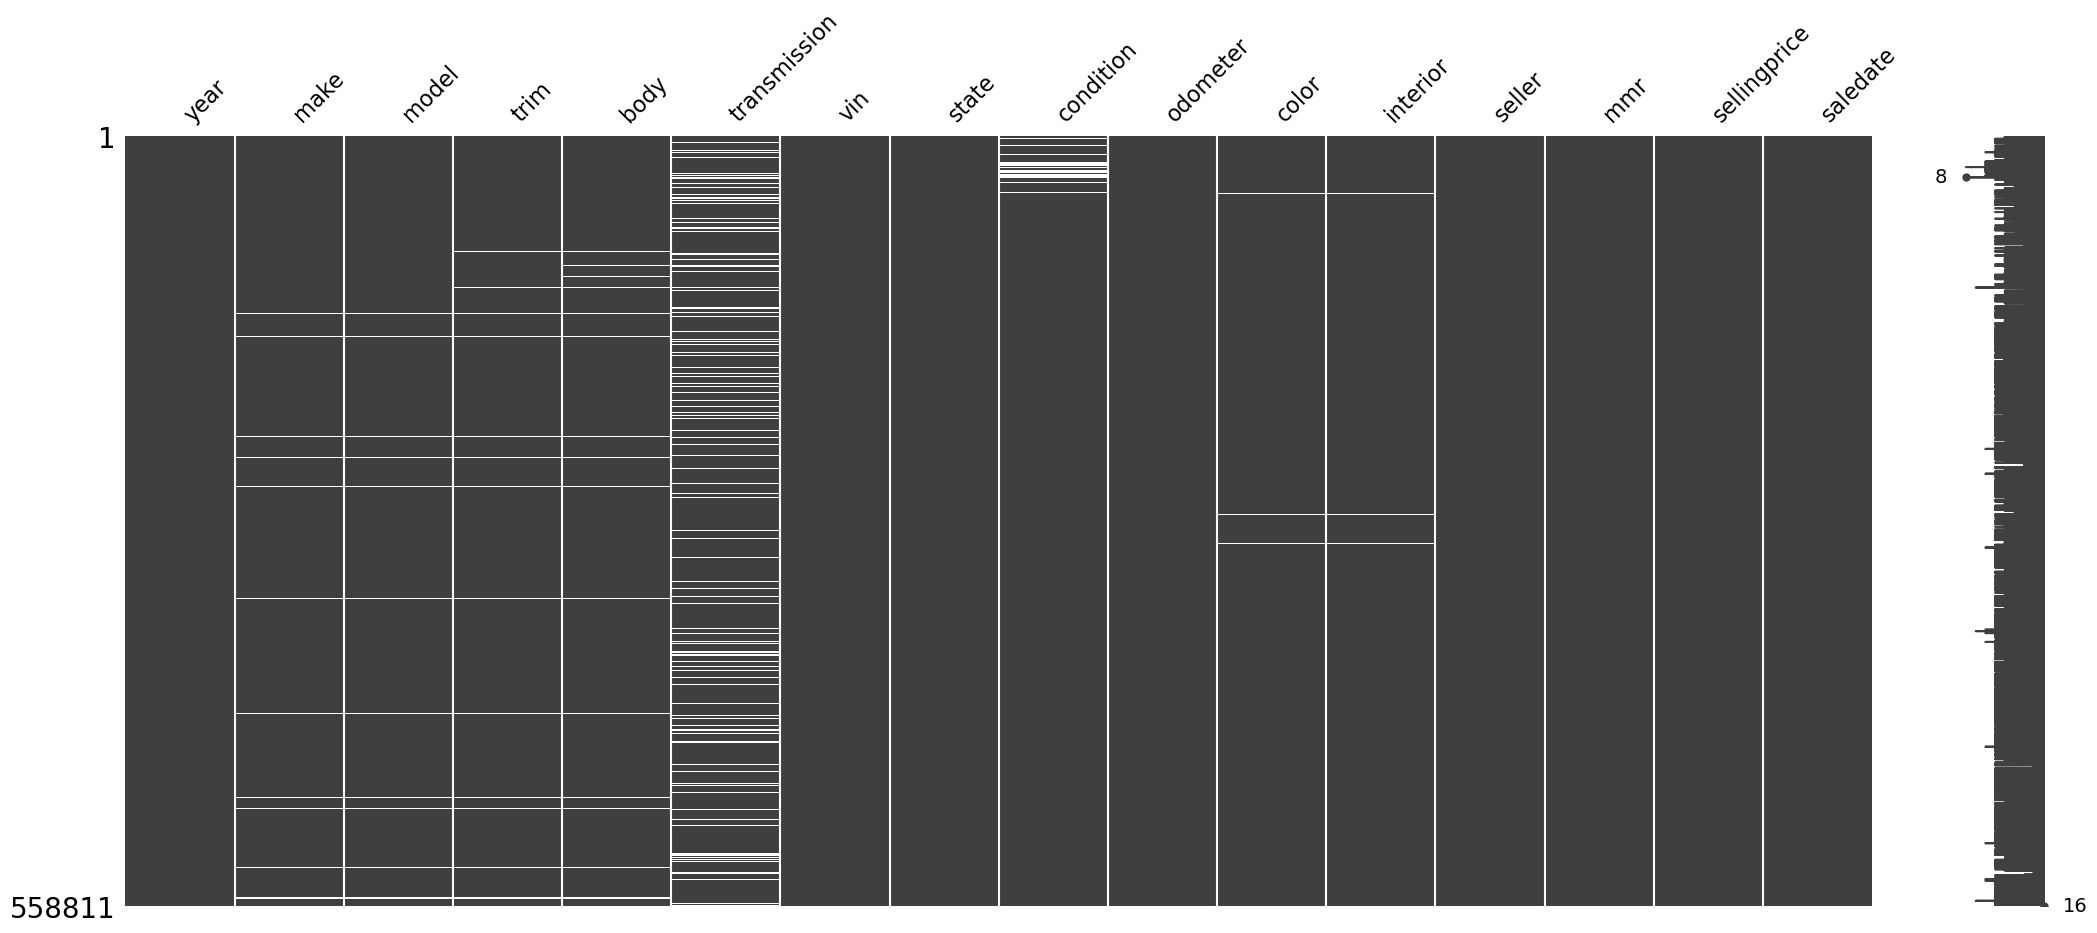

In [22]:
# Melihat null values dari keseluruhan dataset

msno.matrix(dfcar)

Pada matrix diatas kita dapat melihat kolom-kolom yang memiliki null value secara visual, yaitu kolom 'make', 'model', 'trim', 'body', 'transmission', 'condition', 'color', 'interior'. Sebenarnya kolom 'odometer' juga memiliki null value namun tidak terlihat karena jumlah null value yang dimiliki sangat sedikit, yaitu hanya 94 dari 500000++ data seperti yang terlihat pada saat Data Exploration sebelumnya.

### Check Nilai Min dan Max

Seperti analisis sebelumnya dimana kita menemukan nilai min dan max yang terkesan tidak masuk akal, maka kita akan mengecek data yang mengandung nilai tersebut.  

Beberapa kolom tersebut adalah 'odometer', 'mmr', dan 'sellingprice'.

**1. Nilai min dan max dari kolom Odometer**

In [52]:
min_odo = dfcar[dfcar['odometer'] == 1.000]
min_odo

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
697,2013,Nissan,Maxima,3.5 S,Sedan,automatic,1n4aa5apxdc839917,ca,1.000,1.000,gray,black,enterprise vehicle exchange / tra / rental / t...,16950,1000,2015-01-13 05:00:00+00:00
1000,2012,Chrysler,200,LX,Sedan,automatic,1c3ccbab7cn236141,ca,NaN,1.000,gray,black,santander consumer,10450,1300,2014-12-16 05:00:00+00:00
1723,2012,Mercedes-Benz,M-Class,ML63 AMG,SUV,NaN,4jgda7eb0ca049551,ca,NaN,1.000,NaN,NaN,high bid trading co inc,69000,18500,2014-12-18 04:00:00+00:00
2082,2011,NaN,NaN,NaN,NaN,automatic,1ftlr1fe5bpa06821,ca,NaN,1.000,white,—,onemain rem/e motorcars,18300,11500,2014-12-18 04:00:00+00:00
2942,2009,Honda,Civic,LX,Sedan,automatic,2hgfa16579h341583,ca,3.000,1.000,silver,gray,"ahfc/honda lease trust/hvt, inc.",9325,1000,2015-06-30 03:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551550,2002,Saturn,S-Series,SL2,Sedan,NaN,1g8zj54702z304849,wa,2.000,1.000,silver,black,donate for charity,1700,350,2015-06-16 22:30:00+00:00
551596,2000,Subaru,Outback,Limited,wagon,automatic,4s3bh6862y7671346,wa,2.000,1.000,black,gray,donate for charity,3025,1050,2015-06-16 22:30:00+00:00
553939,2012,Ford,Taurus,SE,sedan,automatic,1fahp2dw4cg130924,ca,3.300,1.000,red,beige,high performance capital,12650,3700,2015-06-23 22:30:00+00:00
557280,2001,Dodge,Ram Pickup 1500,ST,regular cab,automatic,1b7hc16x31s209808,ms,1.000,1.000,white,gray,select remarketing group llc/midwest title loans,1750,300,2015-06-17 22:02:00+00:00


In [53]:
max_odo = dfcar[dfcar['odometer'] == 999999.000]
max_odo

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
275,2013,Hyundai,Elantra Coupe,GS,Elantra Coupe,automatic,kmhdh6ae8du017422,ca,1.000,999999.000,blue,gray,hyundai motor finance,8025,2500,2015-01-26 20:00:00+00:00
4626,2003,Chevrolet,Silverado 1500,LS,Extended Cab,automatic,1gcec19v43e225059,ca,2.000,999999.000,gray,gray,800 loan mart,1425,700,2014-12-16 05:00:00+00:00
13317,2009,Chevrolet,Cobalt,LT,Coupe,automatic,1g1at18h797165360,tx,NaN,999999.000,white,gray,mei finance,3375,400,2014-12-18 06:00:00+00:00
13480,2009,Dodge,Charger,Base,Sedan,automatic,2b3ka43d49h578284,il,1.000,999999.000,black,gray,santander consumer,3850,1700,2014-12-23 05:00:00+00:00
13568,2009,Dodge,Charger,Base,Sedan,automatic,2b3ka43dx9h521300,tx,1.000,999999.000,blue,black,santander consumer,4150,5500,2015-01-08 06:10:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489822,2008,Chrysler,300,Touring,sedan,automatic,2c3la53g88h288734,ca,2.700,999999.000,silver,beige,chrysler capital,4325,1200,2015-06-01 23:00:00+00:00
490450,2002,Ford,Expedition,Eddie Bauer,suv,automatic,1fmru17l72la49923,tx,2.000,999999.000,black,gray,titlemax/leon valley tx1,600,600,2015-06-02 20:20:00+00:00
501462,2011,Volkswagen,Jetta,SEL,sedan,NaN,3vwlx7aj1bm387406,tx,1.000,999999.000,white,tan,santander consumer,8600,1100,2015-06-02 22:30:00+00:00
513201,2006,Ford,Taurus,SEL,sedan,automatic,1fafp56u06a197709,oh,1.900,999999.000,gray,gray,car now acceptance co/columbus,175,400,2015-06-10 19:00:00+00:00


Dari data min dan max kolom 'odometer' diatas terlihat bahwa data tersebut tidak hanya mengandung nilai min dan max yang jauh tetapi pada kolom lain juga tidak normal. Hal tersebut bisa dilihat dari sample diatas dimana banyak mengandung null value, nilai mmr dan selling price yang rendah, dan kondisi yang tidak bagus. Selain itu, ternyata lumayan banyak data tersebut, yaitu lebih dari 1000 data.

**2. Nilai Min Selling Price**

In [49]:
min_price = dfcar[dfcar['sellingprice'] == 1.000]
min_price

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
7566,2002,Ford,F-350 Super Duty,XLT,Crew Cab,NaN,1ftsw31f52ed16477,ca,2.000,NaN,white,gray,laa leasing,7850,1,2015-02-04 20:00:00+00:00
48453,2003,Mercedes-Benz,E-Class,E500,Sedan,automatic,wdbuf70j73a269529,ga,2.100,1.000,black,black,peoples credit company inc,7325,1,2015-01-06 01:30:00+00:00
293223,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew6eda13643,tx,4.100,31886.000,white,gray,u-haul,20800,1,2015-02-11 19:00:00+00:00
348252,1995,Isuzu,Rodeo,LS,SUV,NaN,4s2cm58v9s4375559,va,1.000,254132.000,red,gray,automotive remarketing inc,375,1,2015-03-03 17:05:00+00:00


Nilai min dari selling price yang bernilai 1, terdapat 4 data dari keseluruhan dataset. Hal ini juga perlu menjadi catatan dimana hal ini terkesan tidak masuk akal.

**3. Nilai Min dari MMR**

In [51]:
min_mmr = dfcar[dfcar['mmr'] == 25.000]
min_mmr.sample(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
438409,2000,Ford,Expedition,XLT,SUV,NaN,1fmru1666yla22376,md,1.000,304300.000,silver,black,select remarketing group llc/anderson financial,25,250,2015-05-18 23:00:00+00:00
558168,2003,Saab,9-5,Arc 3.0t,sedan,NaN,ys3ed49z133043714,pa,2.500,189783.000,silver,black,r hollenshead auto sales inc,25,700,2015-06-18 19:00:00+00:00
386755,2002,NaN,NaN,NaN,NaN,NaN,kmhcg35g32u173308,qc,2.200,296901.000,black,gray,auto deall,25,250,2015-03-02 18:00:00+00:00
205709,1997,Nissan,Maxima,GLE,Sedan,automatic,jn1ca21d3vt870132,fl,1.900,220607.000,black,tan,autonation nissan orange park,25,300,2015-01-27 02:00:00+00:00
78379,1995,chevrolet,1500,4x4 ext silver z71,NaN,automatic,2gcek19kxs1187586,md,2.000,284155.000,green,gray,purple heart services inc,25,550,2015-01-05 20:00:00+00:00


Dari data diatas dimana nilai mmr hanya 25, juga terdapat kejanggalan pada kolom yang lainnya. Yaitu, banyak terdapat null value, nilai sellingprice yang tergolong kecil, kondisi yang tidak bagus.

### Data Insight
Beberapa data insight lainnya yang didapat dari univariate analysis

In [23]:
# Mengelompokan berdasarkan make (merk atau brand)
top_make = dfcar.groupby('make').size().sort_values(ascending= False).reset_index(name='count')
top_make

,make,count
0,Ford,93554
1,Chevrolet,60197
2,Nissan,53946
3,Toyota,39871
4,Dodge,30710
...,...,...
91,chev truck,1
92,ford tk,1
93,airstream,1
94,hyundai tk,1


Terlihat bahwa merk mobil paling favorit adalah Ford, lalu selanjutnya disusul oleh Chevrolet, Nissan, Toyota, Dodge, dst.

In [24]:
# Mengelompokan berdasarkan model
top_model = dfcar.groupby('model').size().sort_values(ascending= False).reset_index(name='count')
top_model

,model,count
0,Altima,19349
1,F-150,14479
2,Fusion,12946
3,Camry,12545
4,Escape,11861
...,...,...
968,Paseo,1
969,Q3,1
970,Ram Van,1
971,Regency,1


Terlihat bahwa top model mobil bekas adalah Altima dan top 2 adalah F-150.

In [25]:
# Mengelompokan berdasarkan warna mobil dan warna interior
color = dfcar.groupby('color').size().sort_values(ascending= False).reset_index(name= 'count')
interior = dfcar.groupby('interior').size().sort_values(ascending= False).reset_index(name= 'count')

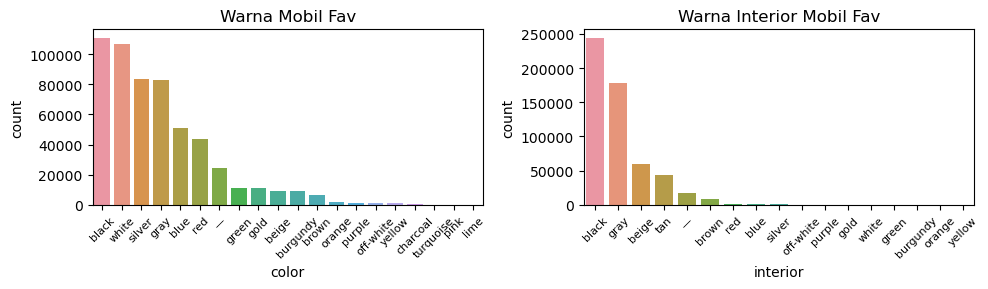

In [30]:
#visualisasi
plt.figure(figsize= (10, 3))

plt.subplot(1,2,1)
sns.barplot(data=color, x='color', y='count')
plt.title('Warna Mobil Fav')
plt.xticks(rotation= 45, size= 8)

plt.subplot(1,2,2)
sns.barplot(data=interior, x='interior', y='count')
plt.title('Warna Interior Mobil Fav')
plt.xticks(rotation= 45, size= 8)
plt.tight_layout()

Dapat terlihat bahwa :
1. Untuk warna mobil dan warna interior mobil paling fav adalah warna hitam
2. Untuk warna mobil putih juga sama banyak dengan warna hitam, beda tipis
3. Warna mobil silver dan gray memiliki jumlah yg setara
4. Warna interior gray juga menjadi fav kedua setelah warna interior hitam